<a href="https://colab.research.google.com/github/sssylvia0/Uplift_Model/blob/main/Preprocess_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocess rawdata extracted from MSSQL
1. Data format
Rawdata_YYYYMM_sql.rar -> dataYYYYMM.csv.zip
  * Train data
  * Test data(For prediction)
2. Data_size:
  * data202304.csv.zip: 1029018 rows × 162 columns
  * data202306.csv.zip:
  * data202308.csv.zip:
  * data202311.csv.zip:
3. Total time


## Data import

In [1]:
#Main import
#連接goole drive
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
#解壓縮
!unrar x /content/drive/MyDrive/Sinopac/Rawdata/Rawdata_202309_sql.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Sinopac/Rawdata/Rawdata_202309_sql.rar

Extracting  Rawdata_202309_sql.csv                                         0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95%

## Data process
* 空值處理
* 重複購買（總和）
* Datatype
* Correlation
* 匯出、壓縮

In [ ]:
#Dask dataframe才能處理大型資料
import dask.dataframe as dd
import pandas as pd
c = pd.read_csv('/content/T.csv')
df = dd.read_csv('/content/Rawdata_202311_sql.csv',on_bad_lines = 'skip', names=c.names,
        dtype={'BIRTH_MM': 'float64',
       '生日月份': 'float64',
        'BILL_SEND_MARK': 'object',
       'BUS_IND_CTG': 'object',
       'CAMPAIGN_ID': 'object',
       'CONTACT_ADDR_VALID': 'object',
       'CUST_ID': 'object',
       'LEAD_ID': 'object',
       'MST_ACCT_ID': 'object',
       'OWNER_IDN': 'object',
       'PHONE8_VALID': 'object',
       'REG_QUO_MARK': 'object',
       'RLT_ACCT_MARK': 'object',
       'SALARY_PROXY_NUM': 'object',
       'SAVING_BOX_MARK': 'object',
       '企金行業別': 'object',
       '對帳單寄送記號': 'object',
       '負責人ID': 'object',
        'GENDER': 'float64',
       '性別': 'float64',
       'ELOAN_JOB_TITLE': 'object',
       'USERID': 'float64',
        'CUSTID': 'object',
        'TIMESTAMP': 'object'}
)
print("原本Columns長度：", len(df.columns))
#length = 670

原本Columns長度： 670


In [1]:
import pandas as pd
df = pd.read_csv('/content/Rawdata_202309_sql.csv', low_memory=False)
print("原本Columns長度：", len(df.columns))
df.columns

原本Columns長度： 175


Index(['UNINO', '年齡', '公司戶記號', '中小企業記號', '性別', 'CIFAOCODE', '呆帳記號_含信用卡',
       '客戶年收入', '客戶行業別', '網路會員記號',
       ...
       '證券推介開戶記號', '信用卡自動扣款記號', '數位帳戶等級記號', '換匯基因標籤', '202311是否被發送',
       '202311活動期間跨售金額', '202311活動期間跨售行為', '近三個月是否發送過外匯名單', '外匯交易金額_近三個月',
       '近三個月是否發送過其他名單'],
      dtype='object', length=175)

In [2]:
df.rename(columns={'202311是否被發送': '換匯發送名單', '202311活動期間跨售金額': 'TOTALNTAMOUNT', '202311活動期間跨售行為': '跨售行為'}, inplace=True)
df.columns

Index(['UNINO', '年齡', '公司戶記號', '中小企業記號', '性別', 'CIFAOCODE', '呆帳記號_含信用卡',
       '客戶年收入', '客戶行業別', '網路會員記號',
       ...
       '證券推介開戶記號', '信用卡自動扣款記號', '數位帳戶等級記號', '換匯基因標籤', '換匯發送名單',
       'TOTALNTAMOUNT', '跨售行為', '近三個月是否發送過外匯名單', '外匯交易金額_近三個月',
       '近三個月是否發送過其他名單'],
      dtype='object', length=175)

In [28]:
df.head(10)

,UNINO,年齡,公司戶記號,中小企業記號,性別,CIFAOCODE,呆帳記號_含信用卡,客戶年收入,客戶行業別,網路會員記號,...,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,近三個月是否發送過外匯名單,外匯交易金額_近三個月,近三個月是否發送過其他名單
0,B2722587610,52,0,-,2.0,038800,0,1000.0,廣告業,1,...,0,N,0,86.9030,0,0,0,1,0,0
1,B2722598470,57,0,-,2.0,038800,0,1200.0,各級學校/學術機構,1,...,0,N,0,86.5721,0,0,0,0,0,0
2,B2722599520,53,0,-,2.0,033S66,0,622.0,運輸或倉儲及通訊業,1,...,0,N,0,51.6446,0,0,0,0,0,0
3,B2722613570,64,0,-,2.0,107S66,0,500.0,家管,1,...,0,Y,0,93.5412,0,0,0,0,31387,0
4,B2722619830,57,0,-,2.0,029800,0,900.0,各級學校/學術機構,1,...,0,N,0,60.7386,0,0,0,0,0,0
5,B2722699340,52,0,-,2.0,035800,0,1800.0,專業人士,1,...,0,N,0,65.5841,0,0,0,0,0,0
6,B2722754750,59,0,-,2.0,038800,0,0.0,家管,1,...,1,N,0,78.6482,0,0,0,0,0,0
7,B2722774620,57,0,-,2.0,047800,0,400.0,技術服務業,1,...,0,N,0,80.2227,0,0,0,0,0,0
8,D1723544970,66,0,-,1.0,036800,0,0.0,貿易買賣業,1,...,0,Y,0,88.3841,0,0,0,0,0,0
9,D1723548090,61,0,-,1.0,017S66,0,1500.0,家管,1,...,0,Y,0,97.4699,0,0,0,0,0,0


In [3]:
%%time
#dask dataframe to pd.dataframe(執行約4min)
#df = df.drop(df.iloc[:, 207:663], axis=1)

#移除無意義的欄位
'''drop_vars = [
   "負責人ID", '美金存款註記','人民幣存款註記','南非幣存款註記','總放款平均利率','一般房貸利率','理財房貸利率_LINE','理財房貸利率_LN',
   '主動推介_特定金錢信託客戶投資有價證券推介同意書', '薪轉公司統編','生日月份','客戶職稱','經管人員AO','分行別','負責人ID', '資料年月',
    '最初開戶日','最初開戶日_YYYYMM','存款開戶日', '信用卡開戶日', '信貸開戶日', '信託帳戶開戶日', '信託第一筆申購日','基金第一筆申購日',
   '房貸開戶日','證券開戶日', '全行往來產品數', '最後通聯日',
   '人身保險記號','保險要保人記號', '保險被保人記號', '產險記號','產險要保人記號', '儲蓄養老險申購記號_要保人','儲蓄養老險申購記號_被保人',
   '投資型保險申購記號_要保人', '投資型保險申購記號_被保人'
]
df = df.drop(columns=drop_vars)
'''
#不處理時間序列 #做one-hot
drop_time = ['存款最近交易日','信託最近交易日','基金最近申購日','證券最近交易日']
df = df.drop(columns=drop_time)
#將dd轉為df
#df = df.compute(low_memory = False)

print('df size:', df.shape)
##df size: (1059099, 171)

df size: (1059099, 171)
CPU times: user 321 ms, sys: 449 ms, total: 770 ms
Wall time: 774 ms


###空值處理

['銀行推介_證券端記號', '跨售行為', '換匯發送名單', '換匯基因標籤', '投資屬性', '客戶行業別', '外幣活存記號', '信用卡職位別', '住宅記號', '企金行業別', 'TOTALNTAMOUNT', 'CUST_ID','CUSTID']

In [31]:
#包含空值的欄位
#print(df.columns[df.isnull().sum()>0].sort_values(ascending = False))
#'銀行推介_證券端記號', '投資屬性', '性別', '客戶行業別', '外幣活存記號', '信用卡職位別', '住宅記號', '企金行業別'
df.isnull().sum().sort_values(ascending = False)
'''
企金行業別               1054599
銀行推介_證券端記號           994382
投資屬性                 901646
信用卡職位別               759320
外幣活存記號               567983
'''

企金行業別               1054599
銀行推介_證券端記號           994382
投資屬性                 901646
信用卡職位別               759320
外幣活存記號               567983
                     ...   
撥款總額房貸                    0
無擔保額度                     0
有擔保額度                     0
撥款總額_理財房貸_343547          0
近三個月是否發送過其他名單             0
Length: 171, dtype: int64

In [4]:
#空值處理
#保留性別、客戶行業別
na_col = ['銀行推介_證券端記號', '投資屬性', '外幣活存記號',
        '信用卡職位別', '住宅記號', '企金行業別']
df = df.drop(columns=na_col)

In [5]:
#客戶行業別
df['客戶行業別'][df['客戶行業別'].isnull()]='其他'
#客戶型別
df['性別'][df['性別'].isnull()]= 2
#補0
#'跨售行為', '換匯發送名單', '換匯基因標籤', 'TOTALNTAMOUNT'
df = df.fillna(0)

<ipython-input-5-21143c2b5c80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['客戶行業別'][df['客戶行業別'].isnull()]='其他'
<ipython-input-5-21143c2b5c80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['性別'][df['性別'].isnull()]= 2


###處理重複購買問題

In [34]:
#確認購買人數、發送人數
print('總購買人數：', len(df[df['跨售行為']>0])) #4913
print('總發送人數：', len(df[df['換匯發送名單']>0])) #43854

#1069684-3538=1066146
df[df.duplicated(subset=['UNINO'], keep='last')] #0

總購買人數： 4913
總發送人數： 43854


,UNINO,年齡,公司戶記號,中小企業記號,性別,CIFAOCODE,呆帳記號_含信用卡,客戶年收入,客戶行業別,網路會員記號,...,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,近三個月是否發送過外匯名單,外匯交易金額_近三個月,近三個月是否發送過其他名單


In [ ]:
import pandas as pd

# 使用groupby和agg将相同UNINO的TOTALNTAMOUNT加总，同时保留所有其他列
agg_funcs = {col: 'first' if col != 'TOTALNTAMOUNT' else 'sum' for col in df.columns}
df = df.groupby('UNINO').agg(agg_funcs)
df.reset_index(drop=True)
df.shape #(1066146, 165)

(1066146, 165)

In [35]:
df[df['TOTALNTAMOUNT']>0] #4913
df[['跨售行為', 'TOTALNTAMOUNT']][df['跨售行為']>0] #4913
df[['跨售行為', 'TOTALNTAMOUNT']][df['跨售行為']>0 & (df['TOTALNTAMOUNT']>0)] #4913

,跨售行為,TOTALNTAMOUNT
25,1,1000
338,1,10000
378,1,20604
599,1,5000
677,1,3000
...,...,...
1057992,1,20000
1058817,1,193308
1058828,1,10755
1058845,1,64470


In [13]:
df.columns
unino = df['UNINO']
drop_id = ['UNINO', 'CIFAOCODE']
df = df.drop(columns=drop_id)

In [14]:
df.info()
#163

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059099 entries, 0 to 1059098
Columns: 163 entries, 年齡 to 近三個月是否發送過其他名單
dtypes: float64(111), int64(44), object(8)
memory usage: 1.3+ GB


###Datatype 處理

In [15]:
df.columns[df.dtypes=='object']

Index(['中小企業記號', '客戶行業別', '對帳單寄送記號', '電子化通路記號_電子帳單或收EDM', '信用卡VIP客戶註記',
       '外幣存款記號', '信用卡轉呆記號', '信用卡自動扣款記號'],
      dtype='object')

In [16]:
#Datatype 處理
#Catrgorical 變數
## define data
var_dummy = df.columns[df.dtypes=='object']
df = pd.get_dummies(df, columns = var_dummy, drop_first = True)
df.insert(0, 'UNINO', unino)
df = df.reset_index(drop = True)
df.shape #(1059099, 205)

(1059099, 205)

In [17]:
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,B2722587610,52,0,2.0,0,1000.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
1,B2722598470,57,0,2.0,0,1200.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
2,B2722599520,53,0,2.0,0,622.0,1,0,0,3,...,0,0,0,1,0,0,0,1,0,0
3,B2722613570,64,0,2.0,0,500.0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,B2722619830,57,0,2.0,0,900.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059094,Q1293509480,77,0,1.0,0,0.0,1,0,0,8,...,0,0,0,1,0,0,0,0,0,1
1059095,Q1293538490,81,0,1.0,0,0.0,1,3,0,3,...,0,0,0,1,0,0,0,0,0,0
1059096,Q1294050330,73,0,1.0,0,500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1059097,Q1294397300,76,0,1.0,0,0.0,1,0,0,6,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059099 entries, 0 to 1059098
Columns: 205 entries, UNINO to 信用卡自動扣款記號_Y
dtypes: float64(111), int64(44), object(1), uint8(49)
memory usage: 1.3+ GB


###Correlation

In [19]:
cor = df.corr()
cor

<ipython-input-19-150a9db5d4b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,網路使用記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
年齡,1.000000,NaN,0.014171,0.028233,-0.002360,NaN,-0.158150,-0.333671,0.253143,0.059853,...,-0.012439,0.027797,-0.022033,0.293367,0.058115,-0.301484,0.040267,-0.049525,0.029342,0.166961
公司戶記號,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
性別,0.014171,NaN,1.000000,-0.021315,-0.001368,NaN,0.003555,-0.008758,-0.013200,-0.003650,...,0.054199,0.002701,-0.049421,0.000681,-0.002553,-0.000210,0.008259,0.020117,-0.017152,-0.004472
呆帳記號_含信用卡,0.028233,NaN,-0.021315,1.000000,-0.000008,NaN,0.009495,-0.014382,-0.010895,-0.016961,...,-0.005702,-0.001985,-0.002938,0.019212,0.011502,-0.021146,-0.008069,-0.017151,0.930231,-0.016100
客戶年收入,-0.002360,NaN,-0.001368,-0.000008,1.000000,NaN,0.005558,-0.002874,-0.008210,-0.001618,...,0.001760,0.000679,-0.000910,-0.008983,-0.001369,0.009157,0.000844,0.009292,0.000125,-0.001098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
對帳單寄送記號_2,-0.301484,NaN,-0.000210,-0.021146,0.009157,NaN,0.208662,0.057194,-0.403158,0.036333,...,0.043475,0.004271,0.048571,-0.983158,-0.137777,1.000000,-0.010444,0.197062,-0.020931,-0.047091
信用卡VIP客戶註記_Y,0.040267,NaN,0.008259,-0.008069,0.000844,NaN,0.002747,-0.013461,0.018977,0.054527,...,0.002005,0.009360,0.001772,0.010450,0.000335,-0.010444,1.000000,0.015159,-0.007525,0.114265
外幣存款記號_Y,-0.049525,NaN,0.020117,-0.017151,0.009292,NaN,0.086222,0.166619,-0.245260,0.063505,...,0.023793,0.038067,0.003919,-0.195845,-0.015815,0.197062,0.015159,1.000000,-0.014996,0.042474
信用卡轉呆記號_Y,0.029342,NaN,-0.017152,0.930231,0.000125,NaN,0.007121,-0.013413,-0.009752,-0.015592,...,-0.005495,-0.001460,-0.005378,0.018785,0.012641,-0.020931,-0.007525,-0.014996,1.000000,-0.013201


In [20]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-01-19 08:26:35--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.122.101, 172.253.122.102, 172.253.122.100, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-01-19 08:26:35--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   114MB/s    in 0.2s    

2024-01-19 

<ipython-input-21-bed21fe572e5>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cor, dtype=np.bool))


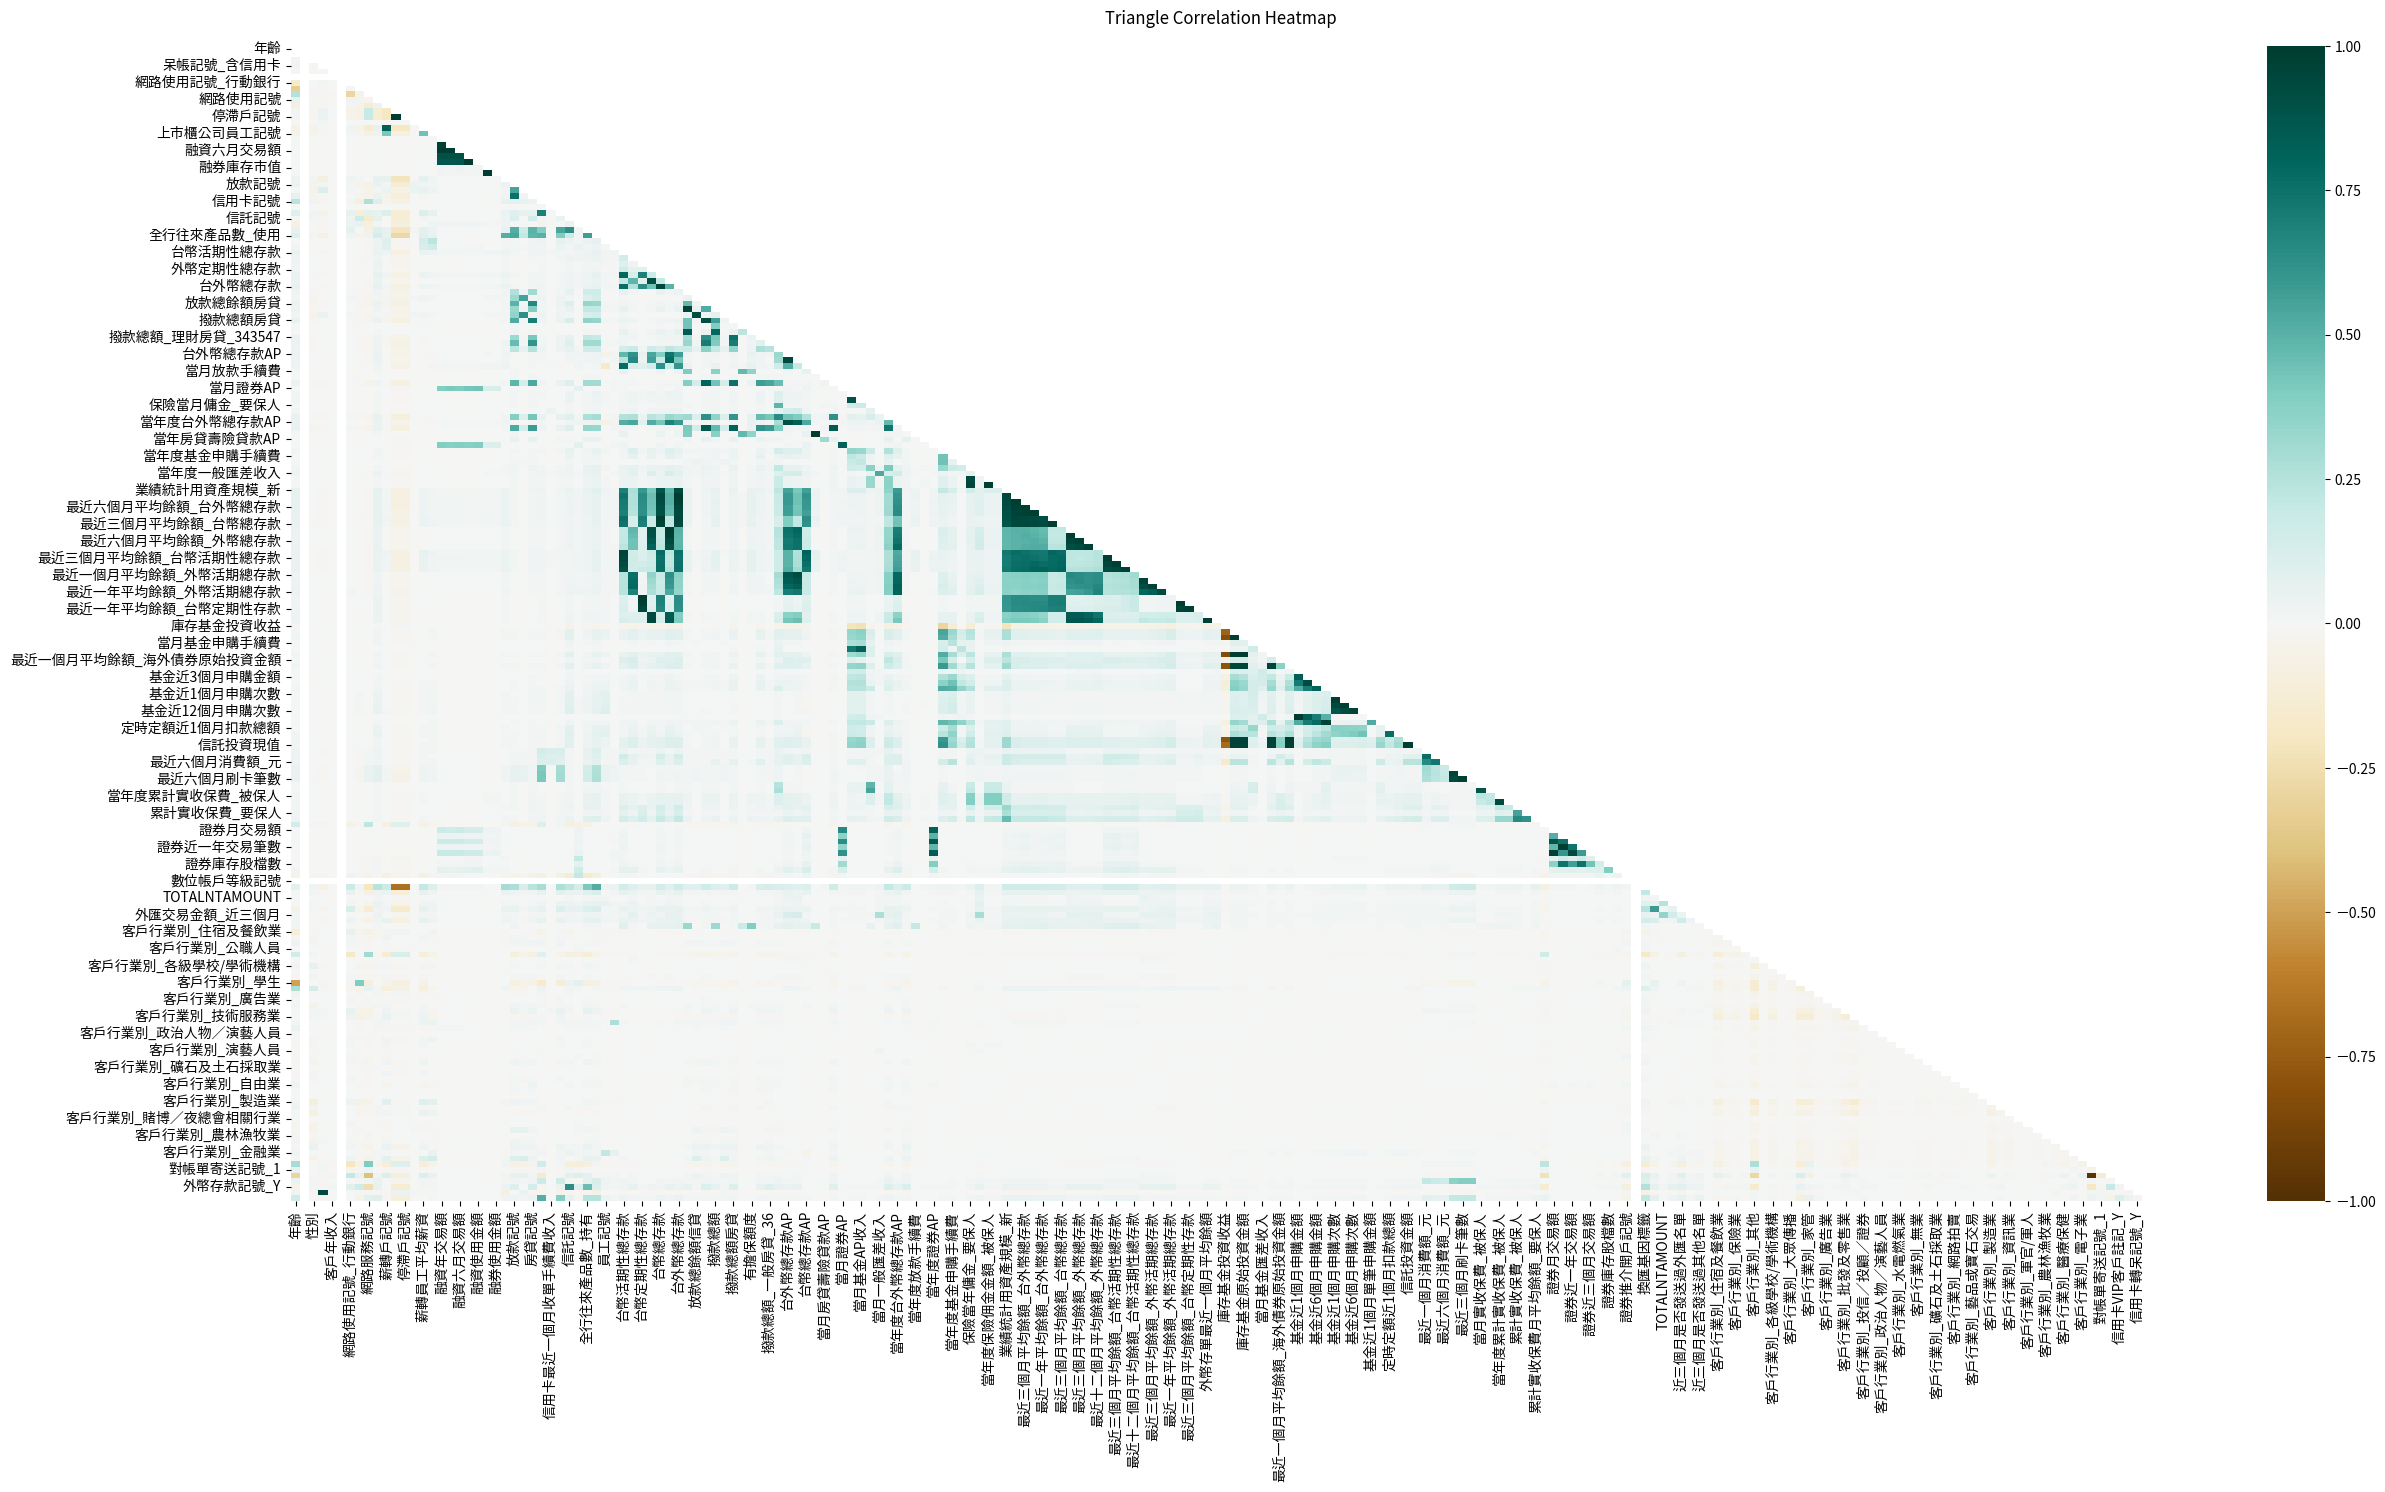

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(cor, dtype=np.bool))
heatmap = sns.heatmap(cor, mask=mask, vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=16);
plt.show()

# Output

In [22]:
#Output 前處理後的資料
#壓縮資料
df.to_csv('/content/drive/MyDrive/Sinopac/Rawdata/data202309.csv.zip', compression = 'zip')
#[1066146 rows x 205 columns]
#[1059099 rows x 205 columns]

In [23]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202309.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [24]:
df = pd.read_csv('/content/data202309.csv', index_col = 0)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,B2722587610,52,0,2.0,0,1000.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
1,B2722598470,57,0,2.0,0,1200.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
2,B2722599520,53,0,2.0,0,622.0,1,0,0,3,...,0,0,0,1,0,0,0,1,0,0
3,B2722613570,64,0,2.0,0,500.0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,B2722619830,57,0,2.0,0,900.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059094,Q1293509480,77,0,1.0,0,0.0,1,0,0,8,...,0,0,0,1,0,0,0,0,0,1
1059095,Q1293538490,81,0,1.0,0,0.0,1,3,0,3,...,0,0,0,1,0,0,0,0,0,0
1059096,Q1294050330,73,0,1.0,0,500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1059097,Q1294397300,76,0,1.0,0,0.0,1,0,0,6,...,0,0,0,0,0,1,0,0,0,0


In [25]:
df.pivot_table(index=['換匯發送名單'], columns= '跨售行為', values= 'TOTALNTAMOUNT', margins=True, aggfunc=['mean', 'max', 'min', 'count'])

mean                            max                     min           \
跨售行為      0             1          All   0         1       All   0    1 All   
換匯發送名單                                                                        
0       0.0  85016.640286   328.009673   0  17474509  17474509   0  100   0   
1       0.0  84689.831325  1923.452182   0   3022469   3022469   0  102   0   
All     0.0  84950.387136   394.071991   0  17474509  17474509   0  100   0   

          count                 
跨售行為          0     1      All  
換匯發送名單                          
0       1011328  3917  1015245  
1         42858   996    43854  
All     1054186  4913  1059099